<a href="https://colab.research.google.com/github/JonyeokLEE/python_COLAB/blob/main/regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf

보스턴 주택 가격 데이터세트를 이용한 주택 가격 예측 네트워크

In [52]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [53]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


Train Dataset: 404 / Test Dataset: 102

각 데이터들은 단위가 다르다. 딥러닝에서는 이러한 데이터를 전처리해서 정규화(Standardization)해야 학습 효율이 좋다.

데이터를 정규화하려면 각 데이터에서 평균값으로 뺀 다음 표준편차로 나눈다.
-> 데이터의 분포를 정규분포로 옮기는 역할을 한다.

In [54]:
# 데이터 전처리
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [55]:
#딥러닝 학습을 위한 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 52)                728       
                                                                 
 dense_25 (Dense)            (None, 39)                2067      
                                                                 
 dense_26 (Dense)            (None, 26)                1040      
                                                                 
 dense_27 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3862 (15.09 KB)
Trainable params: 3862 (15.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


지금처럼 여러 개의 Layor를 겹쳐서 사용할 때에는 sigmoid 함수나 tanh 함수보다 ReLu 함수가 더 better


In [56]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 2s 32ms/step - loss: 0.8566 - val_loss: 0.9850
Epoch 2/25
10/10 [==============================] - 0s 9ms/step - loss: 0.5453 - val_loss: 0.8049
Epoch 3/25
10/10 [==============================] - 0s 10ms/step - loss: 0.4076 - val_loss: 0.6863
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 0.3249 - val_loss: 0.5452
Epoch 5/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2572 - val_loss: 0.4494
Epoch 6/25
10/10 [==============================] - 0s 9ms/step - loss: 0.2190 - val_loss: 0.3877
Epoch 7/25
10/10 [==============================] - 0s 10ms/step - loss: 0.1907 - val_loss: 0.3459
Epoch 8/25
10/10 [==============================] - 0s 11ms/step - loss: 0.1732 - val_loss: 0.3147
Epoch 9/25
10/10 [==============================] - 0s 12ms/step - loss: 0.1553 - val_loss: 0.2909
Epoch 10/25
10/10 [==============================] - 0s 11ms/step - loss: 0.1478 - val_loss: 0.2696
Epoch 11/25

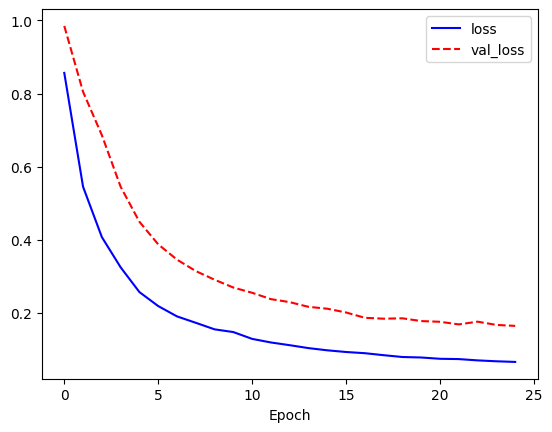

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [58]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1990


0.19897128641605377

4/4 [==============================] - 0s 3ms/step


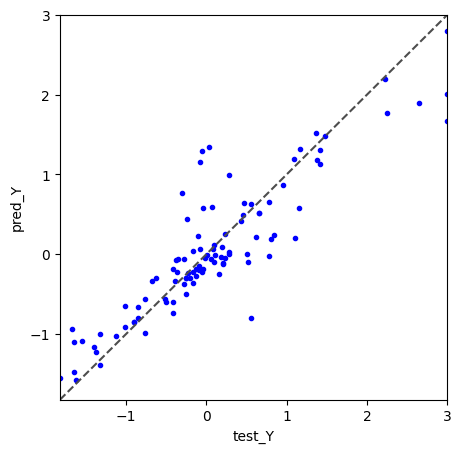

In [59]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()